In [3]:
import pandas as pd
import os
from sklearn.preprocessing import minmax_scale

import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib

font = {'family' : 'Arial',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
matplotlib.rcParams["figure.dpi"] = 140

In [4]:
methods = ('cvae', 'qtr', 'scvi', 'symphony', 'seurat')
conds = ('control', 'stimulated')

In [5]:
repl = dict(cvae='scArches + expiMap', qtr='scArches + expiMap', scvi='scArches + scVI', seurat='Seurat', symphony='Symphony')

## Pancreas metrics

In [6]:
folder = 'pancreas_metrics/'
filenames = os.listdir(folder)

In [7]:
metrics_pancreas = None
for file in filenames:
    for method in methods:
        if method in file:
            df = pd.DataFrame(pd.read_pickle(folder+file), index=[repl[method]])
            del df['adata_name']
            if metrics_pancreas is not None:
                metrics_pancreas = metrics_pancreas.append(df)
            else:
                metrics_pancreas = df

In [8]:
metrics_pancreas.rename_axis('methods', inplace=True)

In [9]:
metrics_pancreas

,PC_regression,ASW_batch,kBET,graph_connectivity,graph_iLISI,graph_cLISI,NMI,ARI,ASW_cell_type
methods,,,,,,,,,
scArches + expiMap,0.830916,0.849592,0.692612,0.950481,0.080352,0.984566,0.749592,0.792801,0.476635
scArches + scVI,0.565996,0.843018,0.685764,0.920962,0.044639,0.963410,0.745554,0.847091,0.452372
Seurat,0.573865,0.898781,0.690482,0.902778,0.021330,0.942469,0.726089,0.823011,0.557160
Symphony,0.366878,0.806508,0.672091,0.924151,0.023225,0.980107,0.627244,0.552168,0.497128


In [10]:
#metrics_pancreas['bio'] = metrics_pancreas.iloc[:, 5:9].mean(axis=1)
#metrics_pancreas['batch'] = metrics_pancreas.iloc[:, :5].mean(axis=1)

In [11]:
#metrics_pancreas['overall'] = metrics_pancreas['batch']*0.4 + metrics_pancreas['bio']*0.6
metrics_pancreas['overall'] = metrics_pancreas.mean(axis=1)

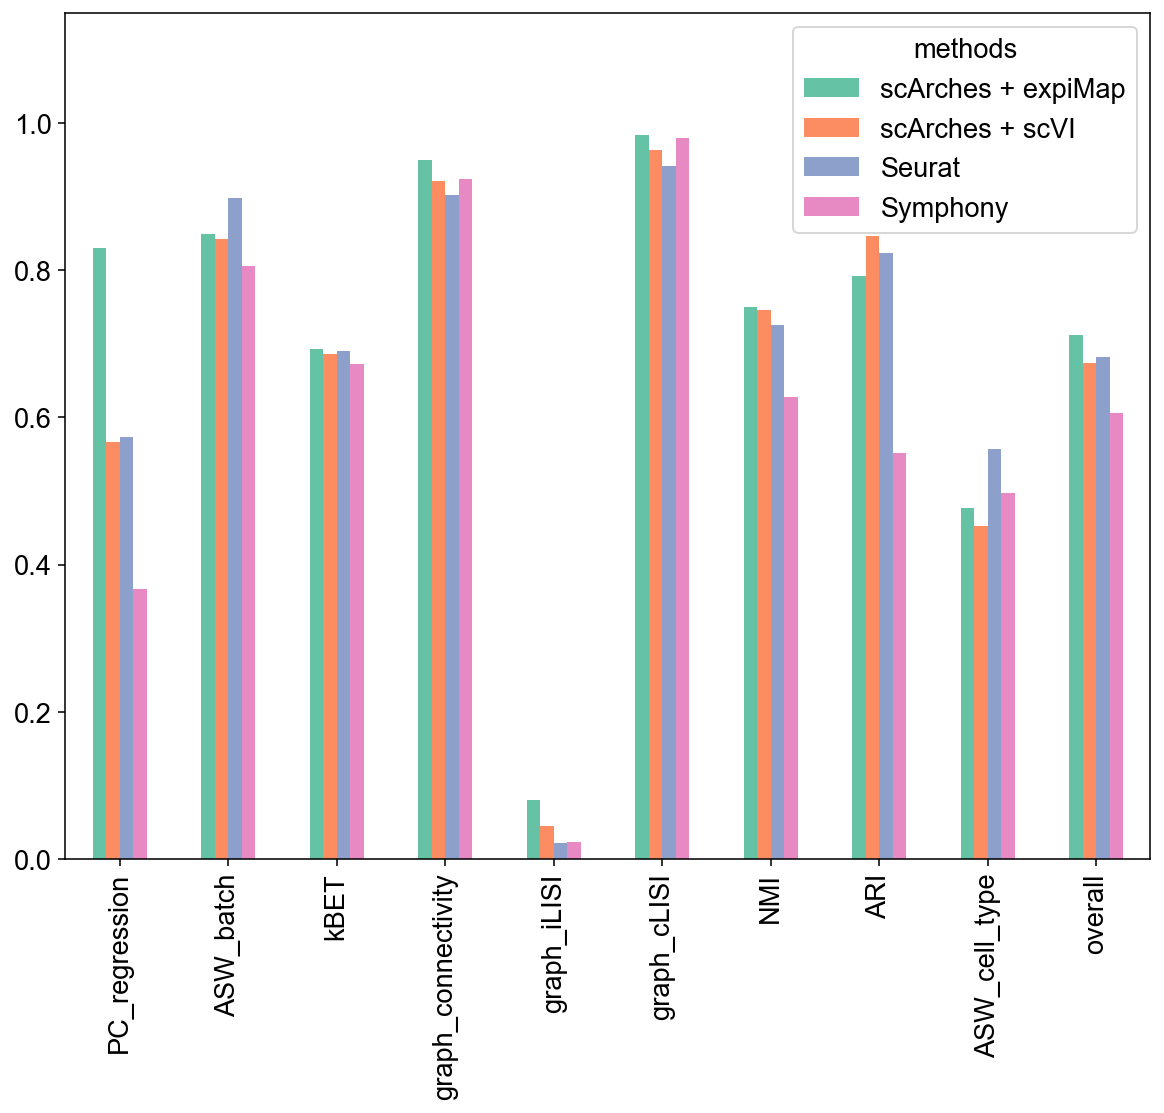

In [23]:
#axs = metrics_pancreas.drop(columns=['bio', 'batch']).T.plot.bar(figsize=(10,8), colormap='viridis')
axs = metrics_pancreas.T.plot.bar(figsize=(10,8), ylim=(0, 1.15), color=sb.color_palette('Set2', 4))

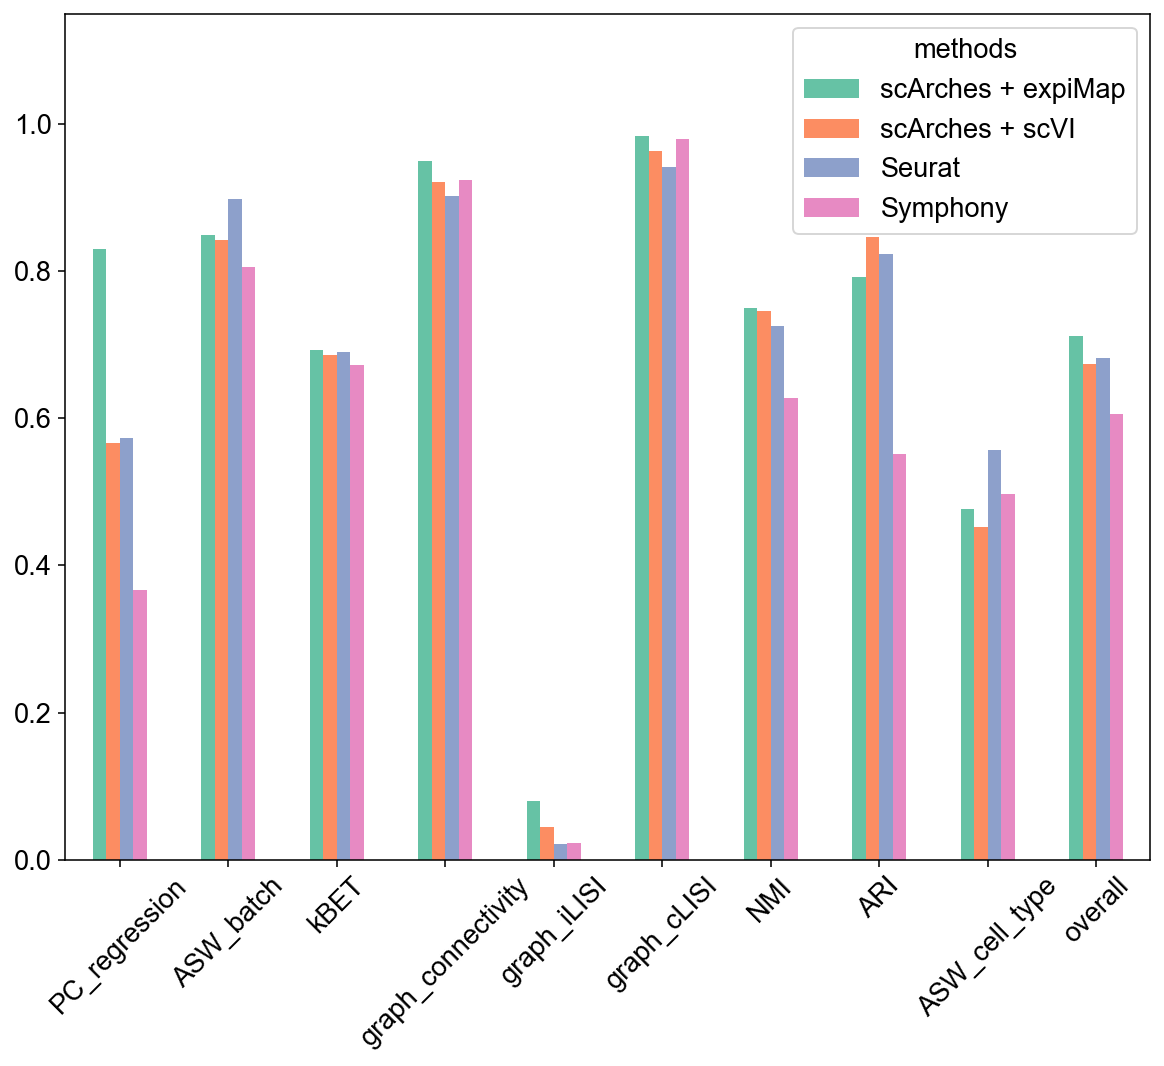

In [24]:
axs.set_xticklabels(axs.get_xticklabels(), rotation=45)
axs.figure

In [ ]:
matplotlib.rcParams['figure.figsize']=(5,5)
sb.scatterplot(x='batch',y='bio',hue='methods',s=100,
                       data=metrics_pancreas, palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0,1)
plt.ylim(0,1)

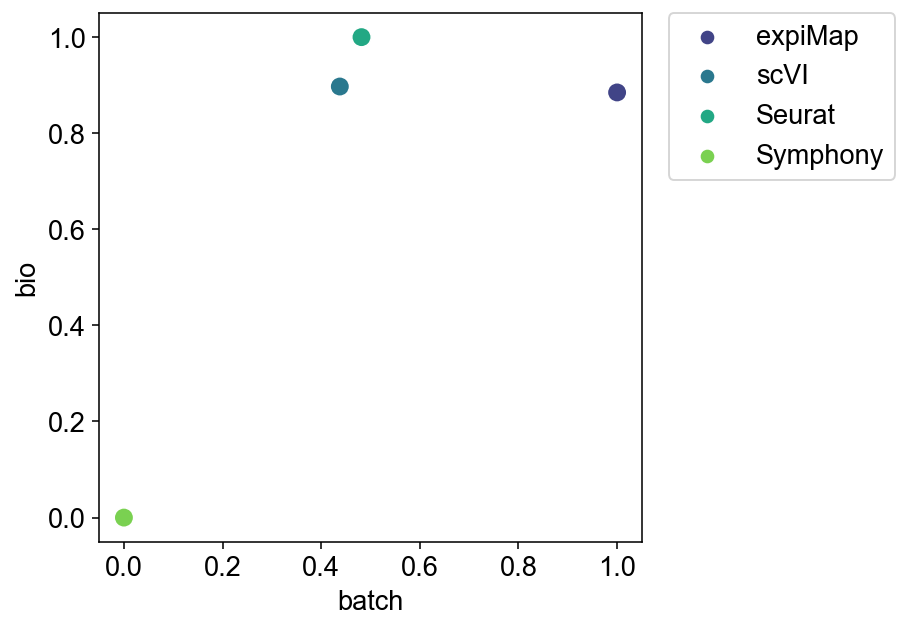

In [39]:
matplotlib.rcParams['figure.figsize']=(5,5)
sb.scatterplot(x='batch',y='bio',hue='methods',s=100,
                       data=metrics_pancreas.apply(minmax_scale), palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)